## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2.3 million compounds. It is compiled from more than 85,000 documents, 1.5 million assays and the data spans 15,000 targets and 2,000 cells and 43,000 indications.
[Data as of July 22, 2022; ChEMBL version 31].

## **Installing libraries**

Install the ChEMBL web service package to retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client
! pip install wheel
! pip install pandas


In [ ]:
! pip install pyopenssl
! pip install ndg-httpsclient
! pip install pyasn1

## **Importing libraries**

In [3]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for Epidermal growth factor receptor erbB1**

In [12]:

target = new_client.target
target_query = target.search('erbB1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,15.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,14.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,13.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
3,[],Homo sapiens,EGFR/PPP1CA,13.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
4,[],Homo sapiens,VHL/EGFR,13.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,10.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Baculoviral IAP repeat-containing protein 2/Ep...,9.0,False,CHEMBL4802031,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Homo sapiens,Epidermal growth factor receptor,7.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606


### **Select and retrieve bioactivity data for *Human Epidermal growth factor receptor erbB1* (first entry)**

In [7]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL203'

In [8]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [9]:
df = pd.DataFrame.from_dict(res)

In [13]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,Not Active,23333712,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4881447,EGFR kinase inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,20.0
15479,None,23353507,[],CHEMBL4883006,"Protein Tyrosine Kinase, EGF Receptor Eurofins...",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,4.59
15480,None,23372725,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884690,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,UO_0000065,None,6.0
15481,None,23373134,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884981,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,UO_0000065,None,6.0


In [14]:
df.to_csv('erbb1_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
missing value for the **standard_value** and **canonical_smiles** column, then remove the compound.

In [15]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_5539/3852201246.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,Not Active,23333712,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4881447,EGFR kinase inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,20.0
15479,None,23353507,[],CHEMBL4883006,"Protein Tyrosine Kinase, EGF Receptor Eurofins...",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,4.59
15480,None,23372725,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884690,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,UO_0000065,None,6.0
15481,None,23373134,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884981,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,UO_0000065,None,6.0


In [16]:
len(df2.canonical_smiles.unique())

9018

In [17]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
6,None,32680,[],CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,9.3
7,None,32770,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,500.0
8,None,32772,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,Not Active,23333712,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4881447,EGFR kinase inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,20.0
15479,None,23353507,[],CHEMBL4883006,"Protein Tyrosine Kinase, EGF Receptor Eurofins...",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,4.59
15480,None,23372725,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884690,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,UO_0000065,None,6.0
15481,None,23373134,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884981,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,UO_0000065,None,6.0


## **Data pre-processing**

In [18]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0
...,...,...,...
15478,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.0
15479,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59
15480,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0
15481,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0


In [19]:
df3.to_csv('erbb1_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values < 1000 nM will be considered to be **active** ; > 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [20]:
df4 = pd.read_csv('erbb1_02_bioactivity_data_preprocessed.csv')

In [21]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [22]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


In [23]:
df5.to_csv('erbb1_03_bioactivity_data_curated.csv', index=False)

In [24]:
! zip erbb1.zip *.csv

updating: erbb1_01_bioactivity_data_raw.csv (deflated 92%)
updating: erbb1_02_bioactivity_data_preprocessed.csv (deflated 82%)
updating: erbb1_03_bioactivity_data_curated.csv (deflated 83%)


In [25]:
! ls -l

total 24568
-rw-r--r--@ 1 yupuwu  staff    73915 Nov 30 21:55 Epidermal growth factor receptor erbB1.ipynb
-rw-r--r--  1 yupuwu  staff  1531002 Nov 30 21:57 erbb1.zip
-rw-r--r--  1 yupuwu  staff  8969167 Nov 30 21:57 erbb1_01_bioactivity_data_raw.csv
-rw-r--r--  1 yupuwu  staff   675193 Nov 30 21:57 erbb1_02_bioactivity_data_preprocessed.csv
-rw-r--r--  1 yupuwu  staff   750623 Nov 30 21:57 erbb1_03_bioactivity_data_curated.csv


In [26]:
df = pd.read_csv('erbb1_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


---

In [27]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [28]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [29]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL68920,41.00,active,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL69960,170.00,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
2,CHEMBL137635,9300.00,intermediate,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12
3,CHEMBL306988,500000.00,inactive,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1
4,CHEMBL66879,3000000.00,inactive,O=C(O)/C=C/c1ccc(O)cc1
...,...,...,...,...
9013,CHEMBL4520788,20.00,active,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...
9014,CHEMBL1800685,4.59,active,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...
9015,CHEMBL4088216,1000.00,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...
9016,CHEMBL4549667,1000.00,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

In [30]:
! pip install rdkit

In [31]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [32]:
# reference: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [33]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,369.432,4.77200,1.0,6.0
3,283.287,2.31056,2.0,4.0
4,164.160,1.49000,2.0,2.0
...,...,...,...,...
9013,448.592,5.57642,2.0,7.0
9014,475.510,7.35780,2.0,2.0
9015,402.454,2.35370,0.0,5.0
9016,481.350,3.11620,0.0,5.0


In [34]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,369.432,4.77200,1.0,6.0
3,283.287,2.31056,2.0,4.0
4,164.160,1.49000,2.0,2.0
...,...,...,...,...
9013,448.592,5.57642,2.0,7.0
9014,475.510,7.35780,2.0,2.0
9015,402.454,2.35370,0.0,5.0
9016,481.350,3.11620,0.0,5.0


In [35]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


In [36]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [37]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [38]:
df_combined.standard_value.describe()

count    9.018000e+03
mean     3.052123e+04
std      6.791141e+05
min      3.000000e-03
25%      3.300000e+01
50%      3.600000e+02
75%      6.700000e+03
max      5.500000e+07
Name: standard_value, dtype: float64

In [39]:
-np.log10( (10**-9)* 100000000 )

1.0

In [40]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [41]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

normalized standard_value 

In [42]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_5539/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,41.00
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,170.00
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,9300.00
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,500000.00
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,3000000.00
...,...,...,...,...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,20.00
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,4.59
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,1000.00
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,1000.00


In [43]:
df_norm.standard_value_norm.describe()

count    9.018000e+03
mean     3.052123e+04
std      6.791141e+05
min      3.000000e-03
25%      3.300000e+01
50%      3.600000e+02
75%      6.700000e+03
max      5.500000e+07
Name: standard_value_norm, dtype: float64

In [44]:
df_final = pIC50(df_norm)
df_final

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_5539/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,7.698970
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,8.338187
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [45]:
df_final.pIC50.describe()

count    9018.000000
mean        6.438213
std         1.478061
min         1.259637
25%         5.173925
50%         6.443697
75%         7.481486
max        11.522879
Name: pIC50, dtype: float64

In [46]:
df_final.to_csv('erbb1_04_bioactivity_data_3class_pIC50.csv')

In [47]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
5,CHEMBL77085,N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-],inactive,215.168,1.73096,1.0,5.0,4.017729
...,...,...,...,...,...,...,...,...
9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,7.698970
9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,8.338187
9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [48]:
df_2class.to_csv('erbb1_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [51]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

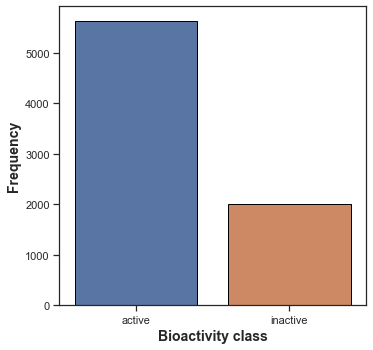

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

#### **pIC50 value**

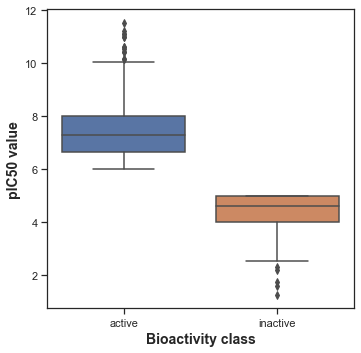

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [55]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [56]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,11257089.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

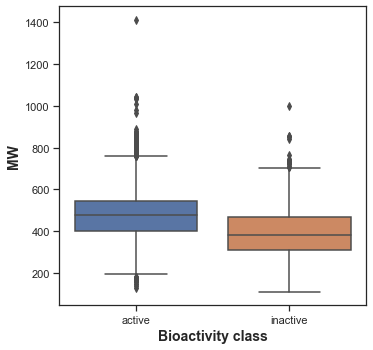

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [58]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,8028989.5,5.653377e-177,0.05,Different distribution (reject H0)


#### **LogP**

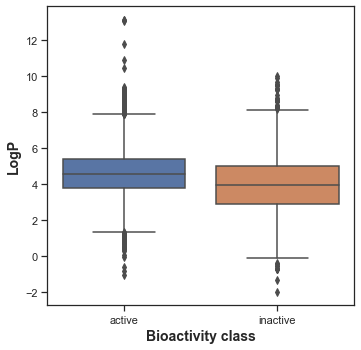

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [60]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,7057124.5,6.293608e-64,0.05,Different distribution (reject H0)


In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [62]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,6195684.0,1.585587e-12,0.05,Different distribution (reject H0)


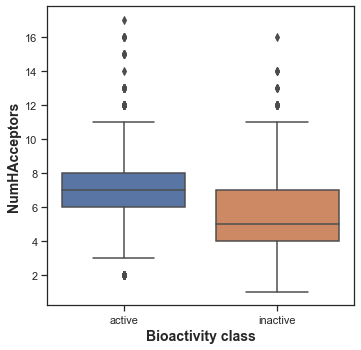

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [ ]:
! pip install wget

In [ ]:
! unzip padel.zip


In [63]:
df3 = pd.read_csv('erbb1_04_bioactivity_data_3class_pIC50.csv')

In [64]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...,...
9013,9013,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,7.698970
9014,9014,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,8.338187
9015,9015,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
9016,9016,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [65]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [66]:
! cat molecule.smi | head -5

Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1	CHEMBL68920
Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21	CHEMBL69960
CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12	CHEMBL137635
CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1	CHEMBL306988
O=C(O)/C=C/c1ccc(O)cc1	CHEMBL66879
cat: stdout: Broken pipe


In [67]:
! cat molecule.smi | wc -l

    9018


## **Calculate fingerprint descriptors**

### **Calculate PaDEL descriptors**

In [68]:
! cat padel.sh

cat: padel.sh: No such file or directory


In [69]:
! bash padel.sh

bash: padel.sh: No such file or directory


## **Preparing the X and Y Data Matrices**

In [ ]:
df3

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

In [ ]:
df3_Y = df3['pIC50']
df3_Y

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

In [ ]:
dataset3.to_csv('erbb1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('erbb1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["pIC50"])

X = df.drop('pIC50', axis=1)
X

The ***erbb1*** data set contains  input features and 1 output variable (pIC50 values).

In [ ]:
Y = df.pIC50

Y

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

## **Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

In [ ]:
X_test.shape, Y_test.shape

## **Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
! pip install lazypredict

Compare model perfromance


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
import lazypredict

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [ ]:
predictions_train

In [ ]:
predictions_test

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))